Problem 1: Data I/O and Data Selection

In [19]:
import pandas as pd

houseData = pd.read_csv(r'C:\Users\27236\Desktop\train.csv')

In [15]:
houseData_1b = houseData[(houseData['OverallQual'] > 5) & (houseData.index < len(houseData)/2)]


In [16]:
houseData_1b.to_excel('train_1b.xlsx', index=False)

In [17]:
largest_lot_area = houseData['LotArea'].max()
mean_lot_area = houseData['LotArea'].mean()

print("Largest LotArea:", largest_lot_area)
print("Mean LotArea:", mean_lot_area)


Largest LotArea: 215245
Mean LotArea: 10516.828082191782


In [18]:
num_columns = houseData.shape[1]

print("Number of columns in houseData:", num_columns)

Number of columns in houseData: 81


Problem 2: Analysis of Numeric Variables 

In [27]:
import pandas as pd

houseNumData = houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']]

             LotArea    GrLivArea  TotalBsmtSF   GarageArea      SalePrice
count    1460.000000  1460.000000  1460.000000  1460.000000    1460.000000
mean    10516.828082  1515.463699  1057.429452   472.980137  180921.195890
std      9981.264932   525.480383   438.705324   213.804841   79442.502883
min      1300.000000   334.000000     0.000000     0.000000   34900.000000
25%      7553.500000  1129.500000   795.750000   334.500000  129975.000000
50%      9478.500000  1464.000000   991.500000   480.000000  163000.000000
75%     11601.500000  1776.750000  1298.250000   576.000000  214000.000000
max    215245.000000  5642.000000  6110.000000  1418.000000  755000.000000


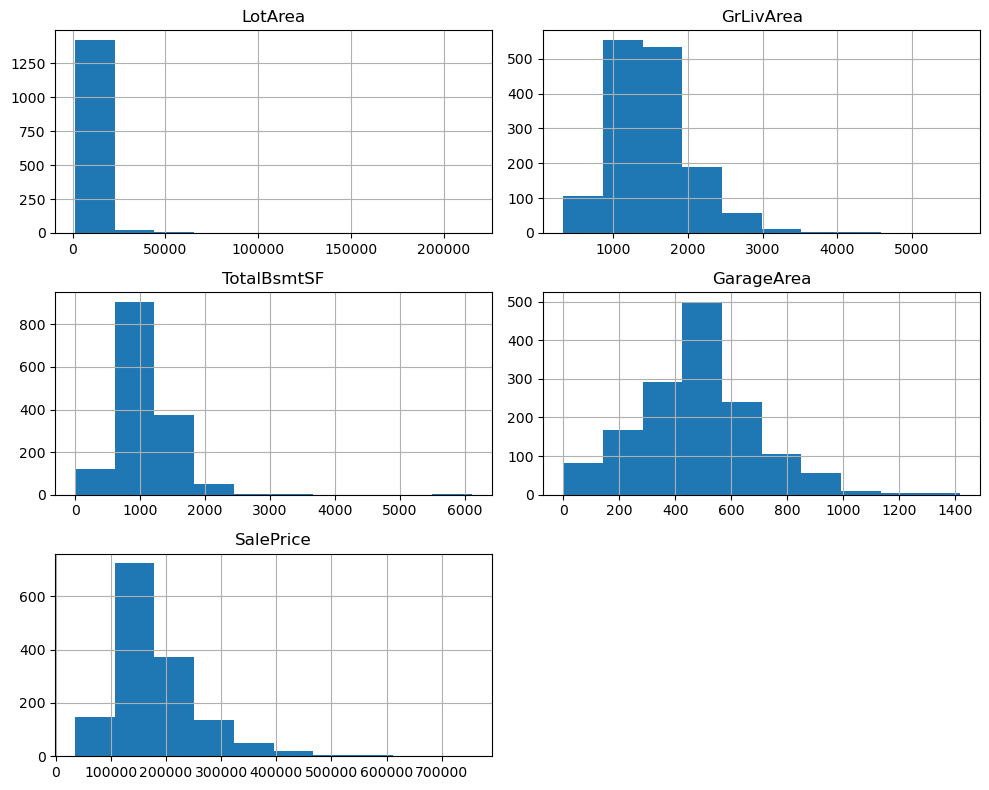

In [21]:
import matplotlib.pyplot as plt

print(houseNumData.describe())

houseNumData.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

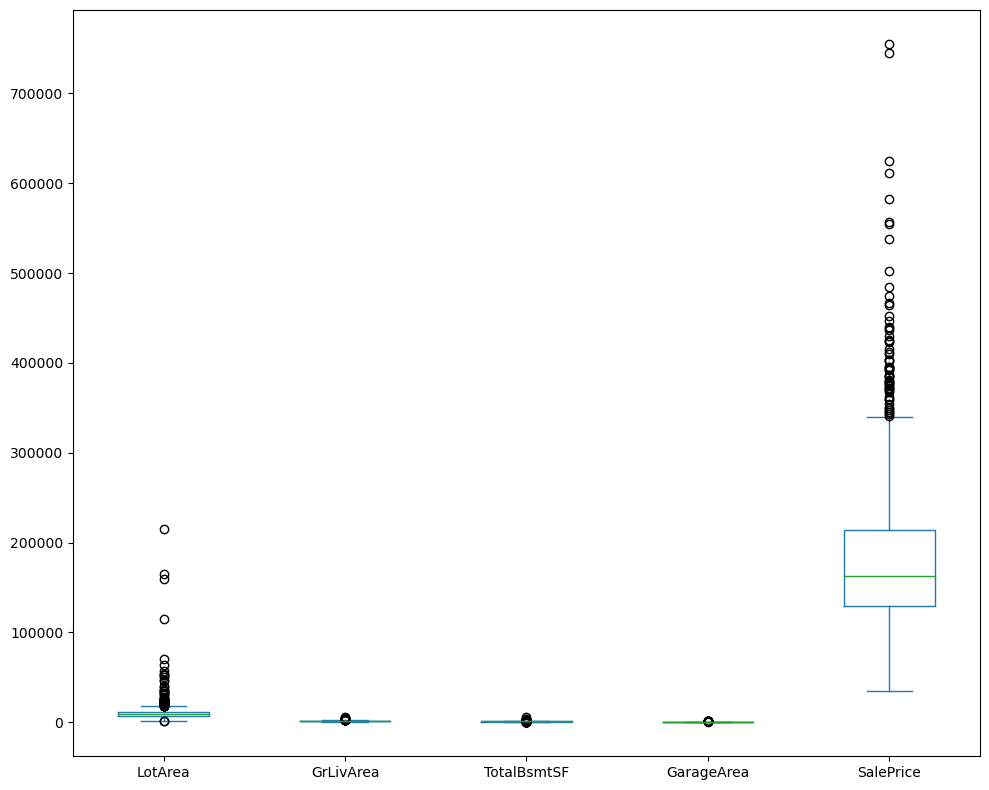

In [22]:
houseNumData.plot(kind='box', figsize=(10, 8))
plt.tight_layout()
plt.show()

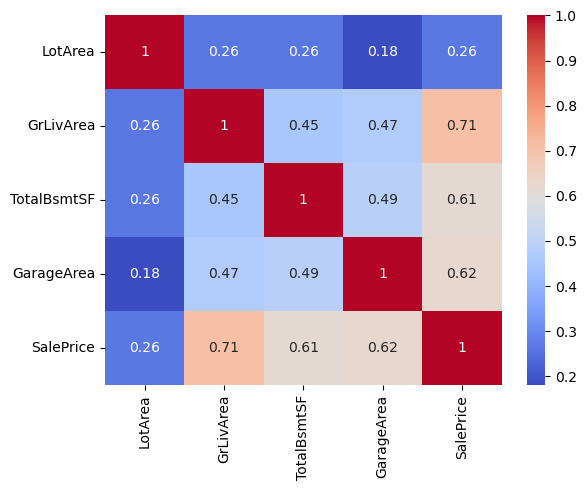

In [24]:
import seaborn as sns
corr_matrix = houseNumData.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

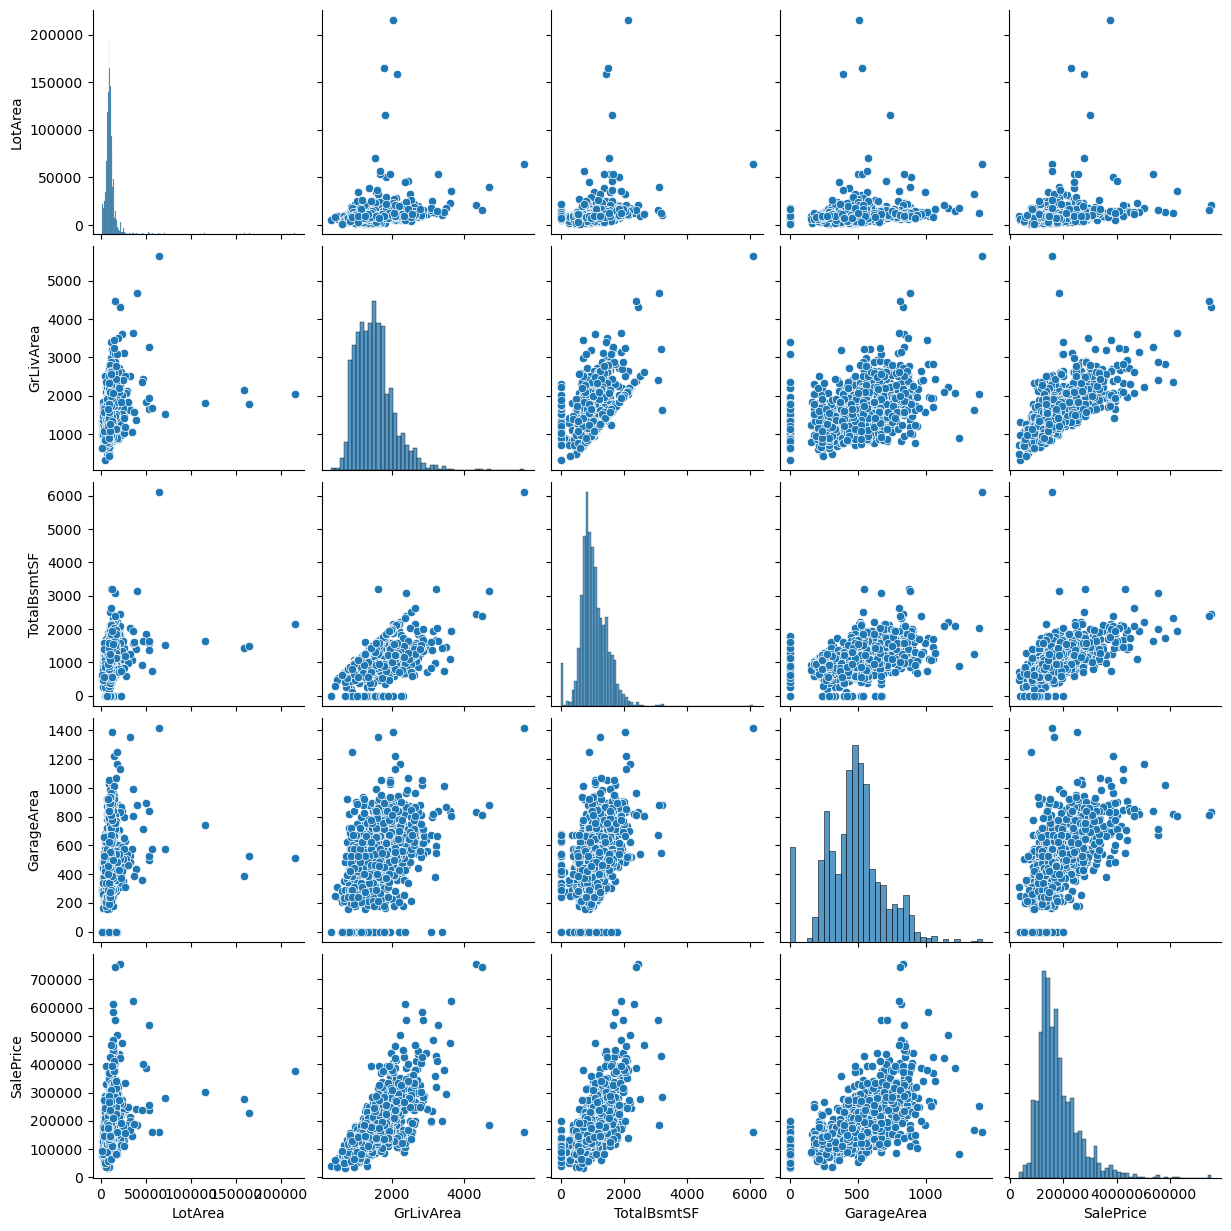

In [25]:
sns.pairplot(houseNumData)
plt.show()

Problem 3: Statistical Summary

In [28]:
import pandas as pd

houseCatData = houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']]

In [29]:
cat_columns = ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']
houseCatData[cat_columns] = houseCatData[cat_columns].astype('category')


C:\Users\27236\AppData\Local\Temp\ipykernel_17612\921771399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houseCatData[cat_columns] = houseCatData[cat_columns].astype('category')


        MSSubClass Neighborhood BldgType  OverallQual
count         1460         1460     1460         1460
unique          15           25        5           10
top             20        NAmes     1Fam            5
freq           536          225     1220          397


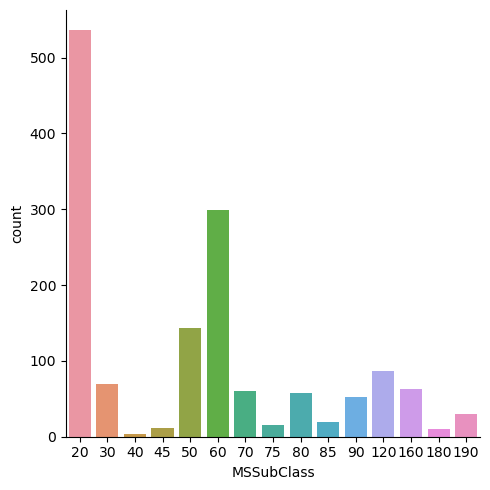

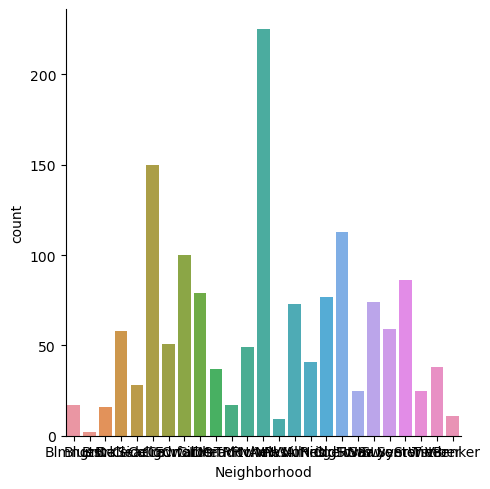

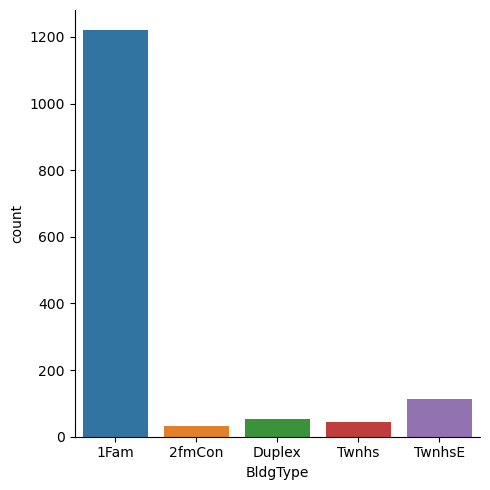

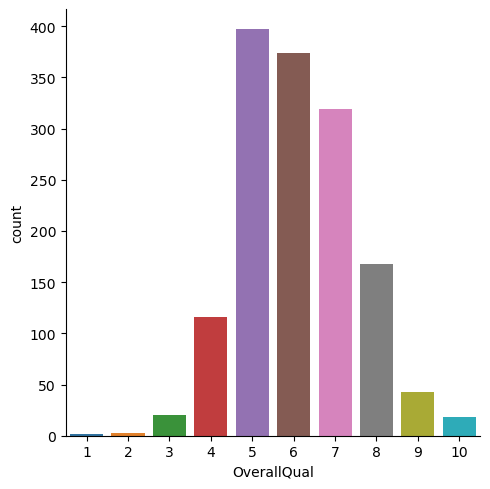

In [31]:
print(houseCatData.describe())
import seaborn as sns
import matplotlib.pyplot as plt

for column in cat_columns:
    sns.catplot(x=column, kind="count", data=houseCatData)
    plt.show()


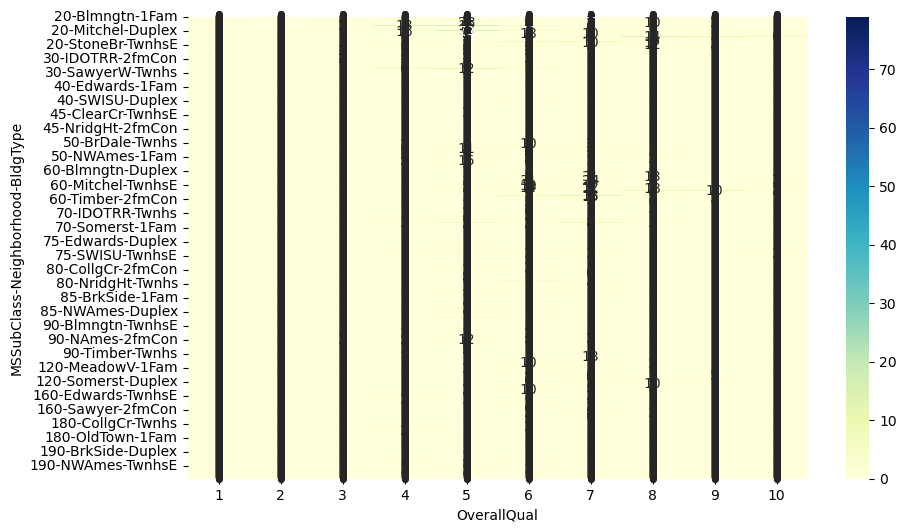

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(houseCatData.groupby(cat_columns).size().unstack(), annot=True, cmap="YlGnBu")
plt.show()

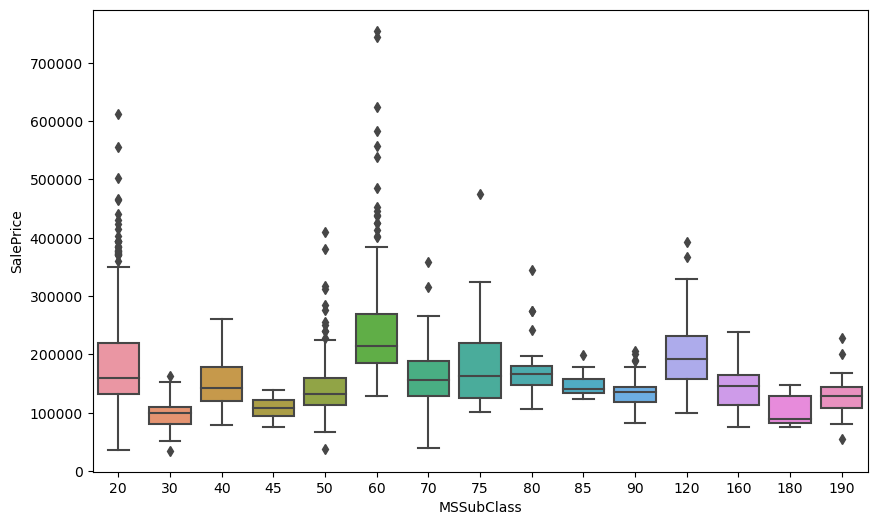

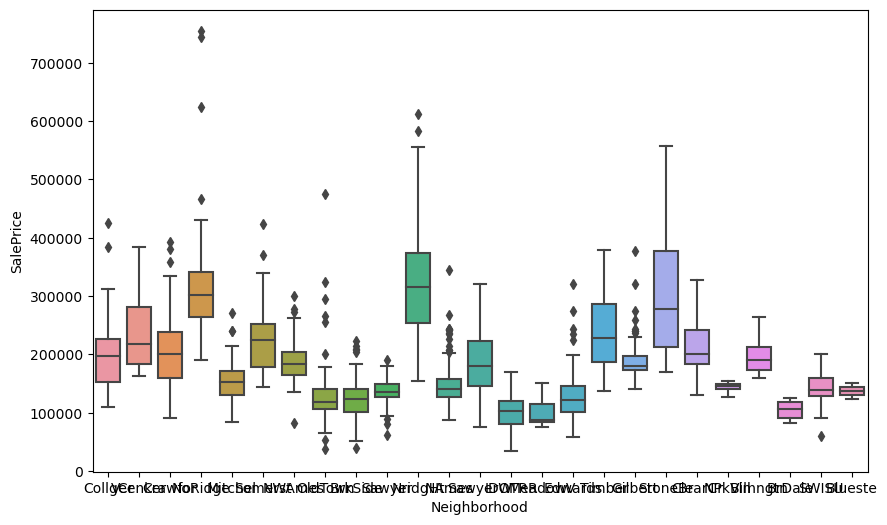

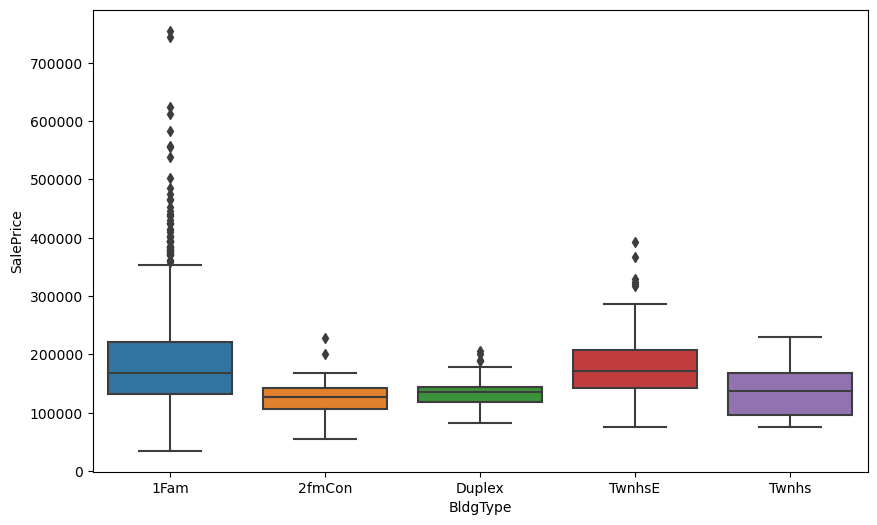

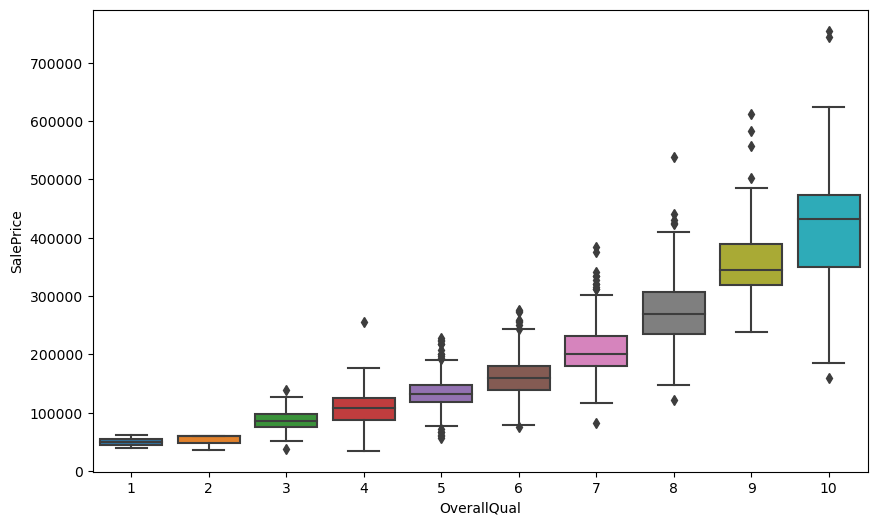

In [33]:
for column in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='SalePrice', data=houseData)
    plt.show()

Problem 4: Open Question

In [8]:
# Check the number of rows and columns in the dataset
num_rows, num_cols = df.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")

# Display the first few rows of the dataset
print(df.head())

# Display the statistical summary of the variables
print(df.describe())

# Check for missing values
print(df.isnull().sum())

The dataset has 1460 rows and 81 columns.
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCo

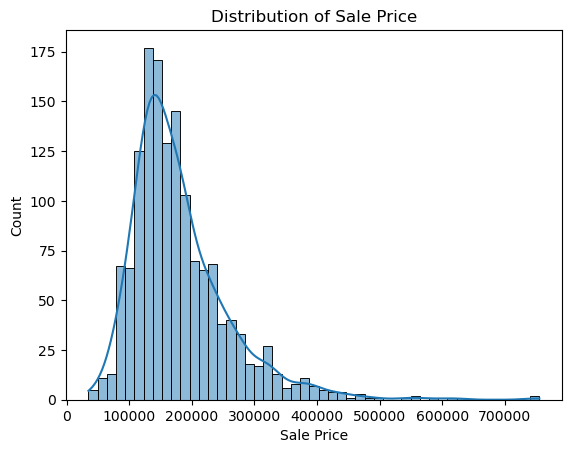

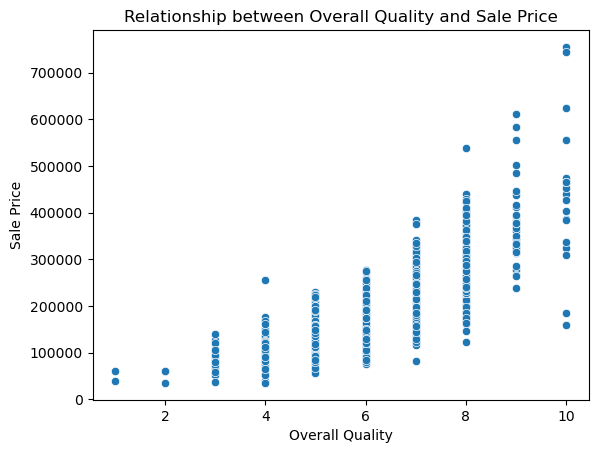

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.histplot(data=df, x='SalePrice', kde=True)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Distribution of Sale Price')
plt.show()

# Plot the relationship between two variables
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Relationship between Overall Quality and Sale Price')
plt.show()

In [10]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient between two variables
corr_coeff, p_value = pearsonr(df['OverallQual'], df['SalePrice'])
print(f"Correlation coefficient: {corr_coeff}, p-value: {p_value}")

Correlation coefficient: 0.7909816005838048, p-value: 2.185675268e-313


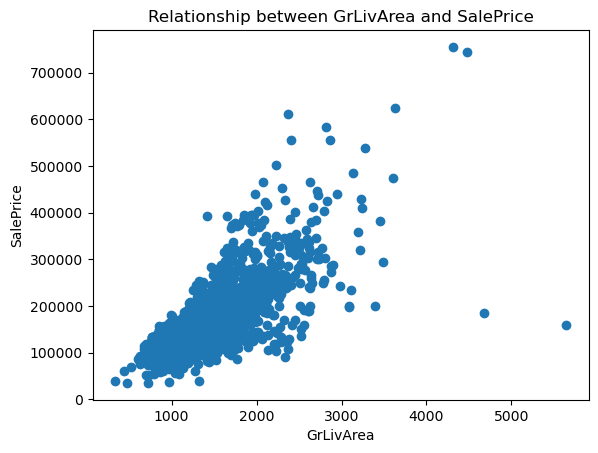

In [11]:
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Relationship between GrLivArea and SalePrice')
plt.show()

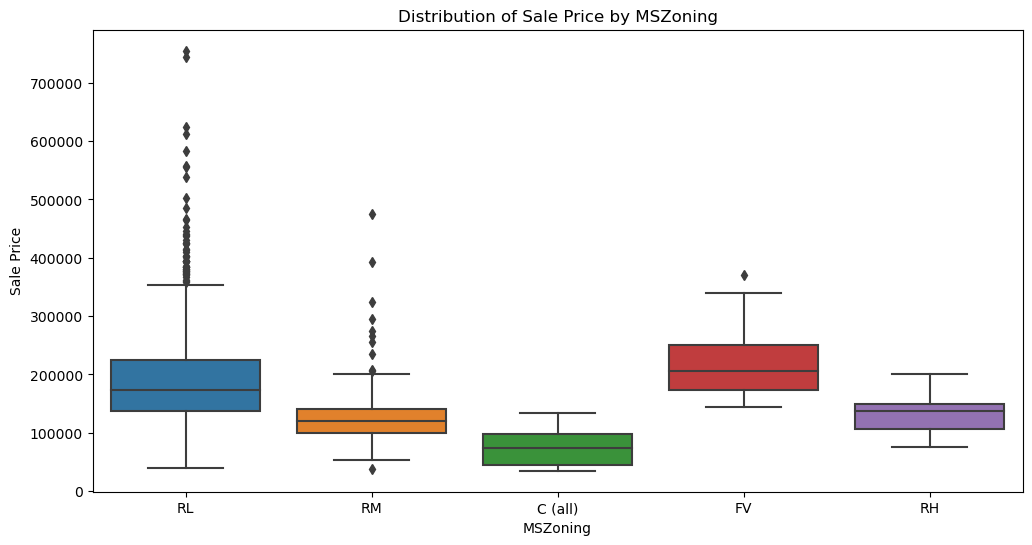

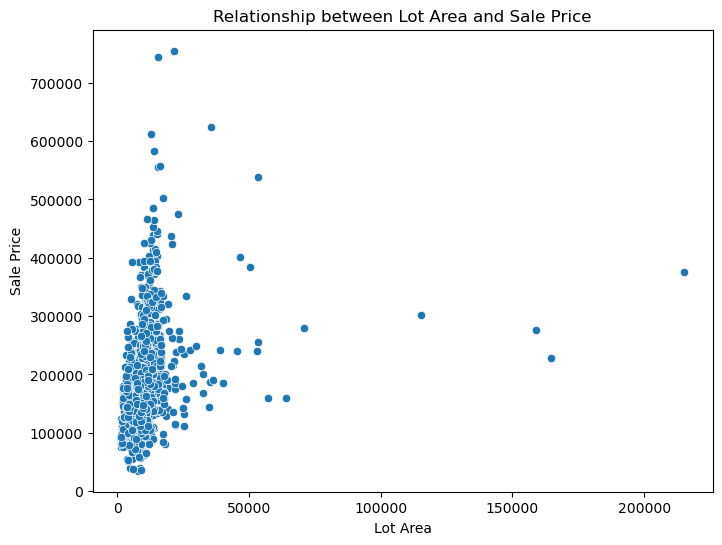

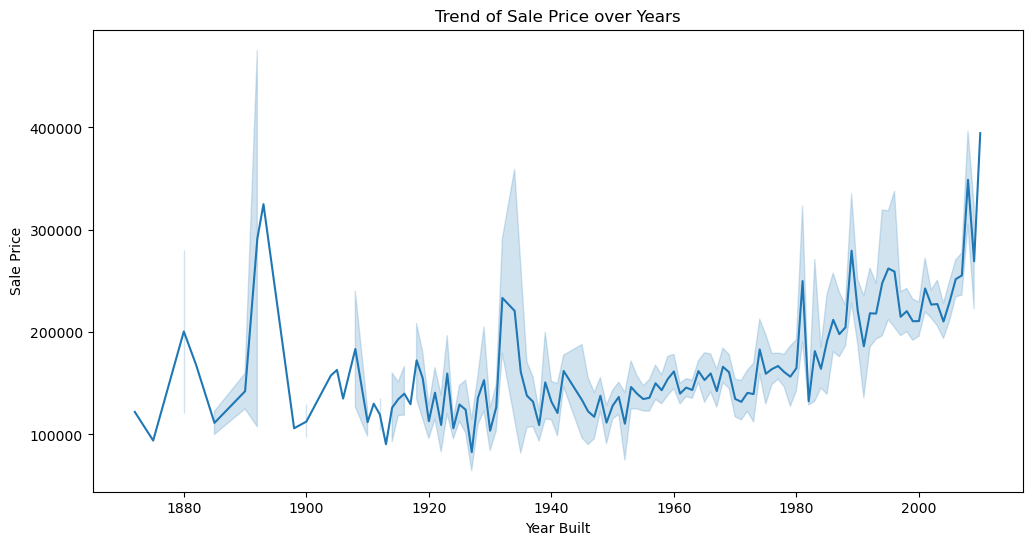

C:\Users\27236\AppData\Local\Temp\ipykernel_5732\964017444.py:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


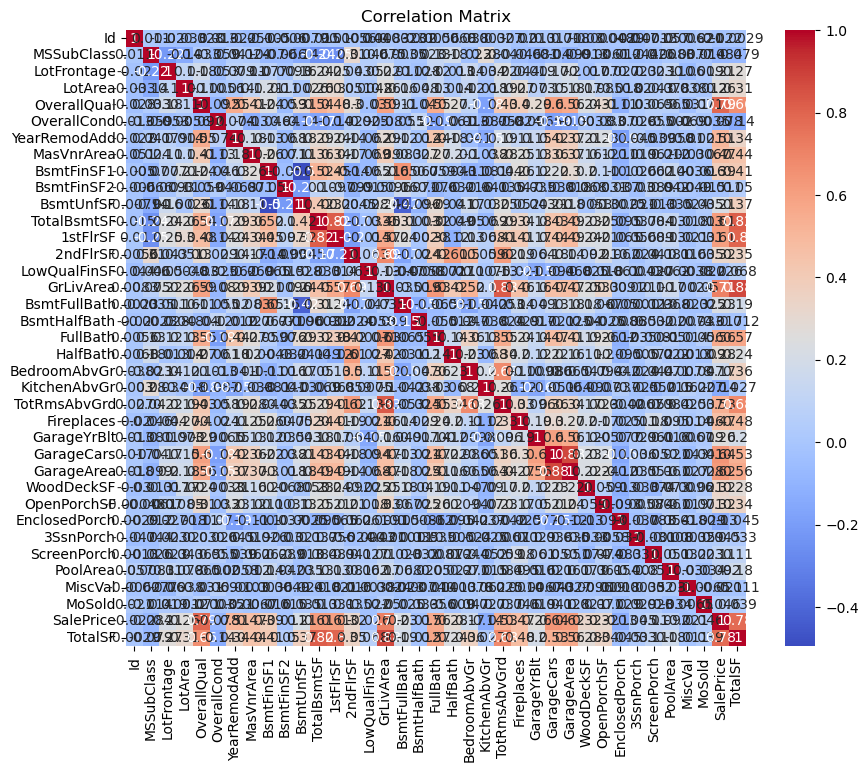

Number of outliers: 61


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('train.csv')

# Handle missing values
df.fillna(0, inplace=True)  # Replace NaN values with 0, you can choose a different approach based on your dataset

# Categorical Variable Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MSZoning', y='SalePrice')
plt.xlabel('MSZoning')
plt.ylabel('Sale Price')
plt.title('Distribution of Sale Price by MSZoning')
plt.show()

# Numerical Variable Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='LotArea', y='SalePrice')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Relationship between Lot Area and Sale Price')
plt.show()

# Time-Series Analysis
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'], format='%Y')
df['YrSold'] = pd.to_datetime(df['YrSold'], format='%Y')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='YearBuilt', y='SalePrice')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Trend of Sale Price over Years')
plt.show()

# Feature Engineering
df['TotalSF'] = df['TotalBsmtSF'] + df['GrLivArea']

# Multivariate Analysis
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Handling Categorical Variables
df = pd.get_dummies(df)

# Drop remaining non-numeric columns
df = df.select_dtypes(include='number')

# Outlier Detection
def detect_outliers(df, variable):
    q25, q75 = df[variable].quantile(0.25), df[variable].quantile(0.75)
    iqr = q75 - q25
    cutoff = 1.5 * iqr
    lower, upper = q25 - cutoff, q75 + cutoff
    outliers = df[(df[variable] < lower) | (df[variable] > upper)]
    return outliers

outliers = detect_outliers(df, 'SalePrice')
print(f"Number of outliers: {len(outliers)}")



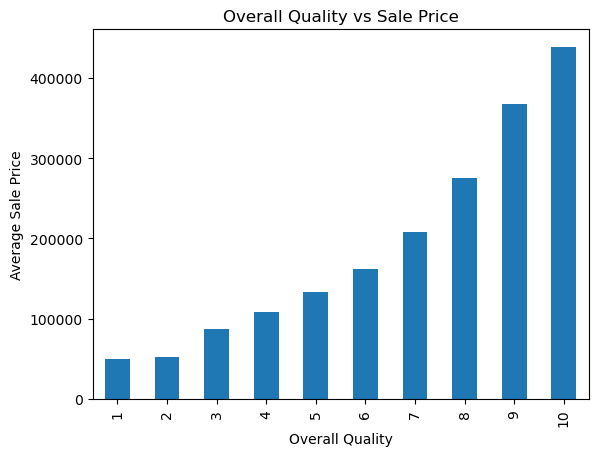

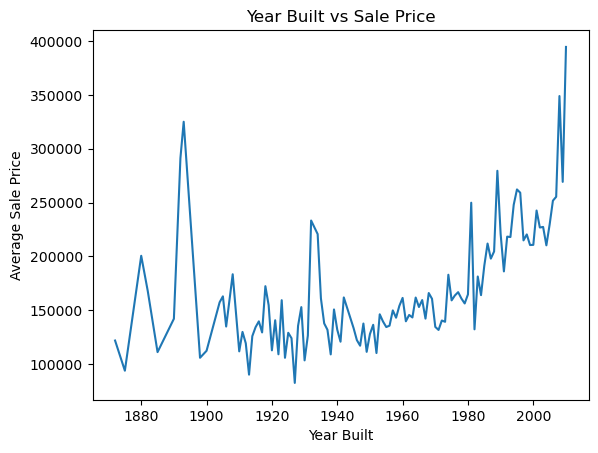

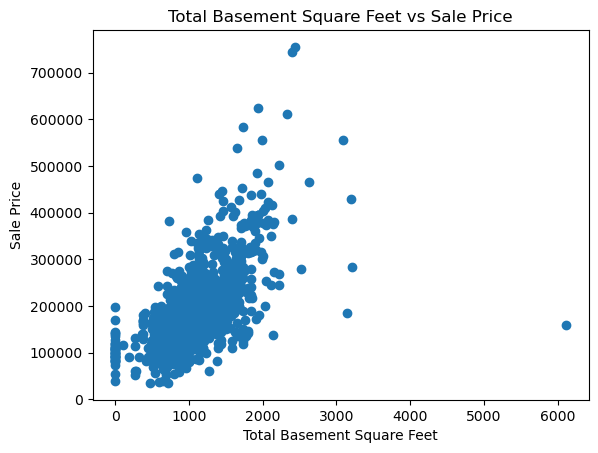

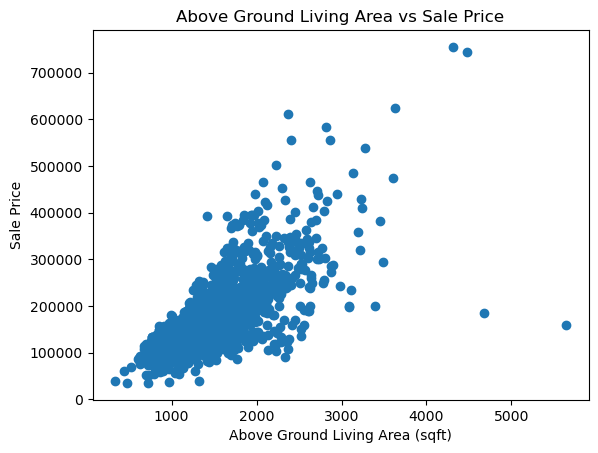

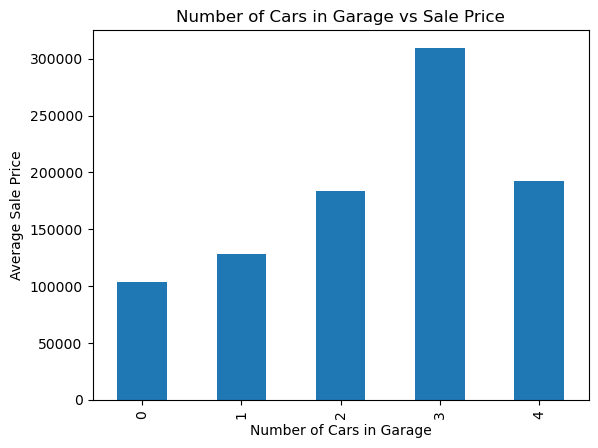

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('train.csv')

# Analyzing OverallQual vs SalePrice
overall_qual_sale_price = data.groupby('OverallQual')['SalePrice'].mean()
overall_qual_sale_price.plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.title('Overall Quality vs Sale Price')
plt.show()

# Analyzing YearBuilt vs SalePrice
data['YearBuilt'] = pd.to_datetime(data['YearBuilt'], format='%Y')
data['YearBuilt'] = data['YearBuilt'].dt.year
year_built_sale_price = data.groupby('YearBuilt')['SalePrice'].mean()
year_built_sale_price.plot()
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.title('Year Built vs Sale Price')
plt.show()

# Analyzing TotalBsmtSF vs SalePrice
plt.scatter(data['TotalBsmtSF'], data['SalePrice'])
plt.xlabel('Total Basement Square Feet')
plt.ylabel('Sale Price')
plt.title('Total Basement Square Feet vs Sale Price')
plt.show()

# Analyzing GrLivArea vs SalePrice
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.title('Above Ground Living Area vs Sale Price')
plt.show()

# Analyzing GarageCars vs SalePrice
garage_cars_sale_price = data.groupby('GarageCars')['SalePrice'].mean()
garage_cars_sale_price.plot(kind='bar')
plt.xlabel('Number of Cars in Garage')
plt.ylabel('Average Sale Price')
plt.title('Number of Cars in Garage vs Sale Price')
plt.show()

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


         OverallQual    YearBuilt  TotalBsmtSF    GrLivArea  GarageCars
Cluster                                                                
0           5.283439  1965.500000   974.640127  1245.598726    2.038217
1           4.913265  1950.683673   827.959184  1109.048469    0.818878
2           8.179487  2000.097436  1695.302564  2159.210256    2.769231
3           6.863636  1997.102871  1090.892344  1636.849282    2.047847
4           6.070922  1924.879433   898.390071  1996.191489    1.581560


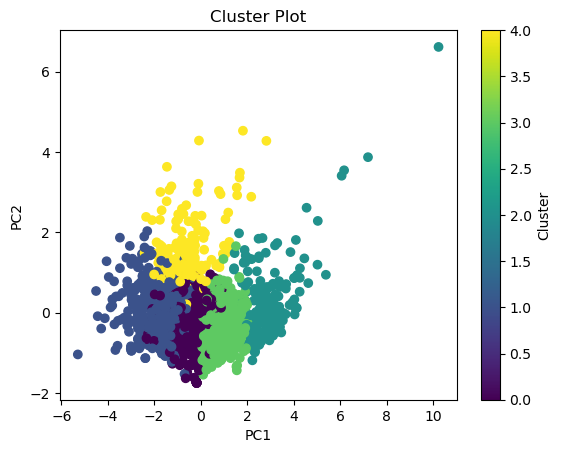

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Select the variables for clustering
selected_variables = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageCars']
X = data[selected_variables]

# Standardize the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering using K-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_analysis = data.groupby('Cluster')[selected_variables].mean()
print(cluster_analysis)

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Plot')
plt.colorbar(label='Cluster')
plt.show()